In [149]:
import env
import pandas as pd
import numpy as np
import utilities as utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_df = pd.read_csv(env.data_path + "anonymized-curriculum-access.txt.gz", compression="gzip", header=None, sep=" ")

In [66]:
log_df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
column_dict = {0 : 'date', 1 : 'time', 2 : 'url', 3 : 'user_id', 4 : 'cohort_id', 5 : 'ip_address'}

log_df = log_df.rename(columns=column_dict)

In [22]:
log_df.groupby(['ip_address', 'unknown']).url.value_counts()

ip_address      unknown  url                                        
100.11.170.135  658      toc                                            17
                         jquery/essential-methods/attributes-and-css    12
                         jquery/events/keyboard-events                  11
                         /                                              10
                         jquery/ajax/requests-and-responses             10
                                                                        ..
99.98.36.168    310      spring/fundamentals/security                    1
                         spring/fundamentals/security/authentication     1
                         spring/fundamentals/services                    1
                         spring/fundamentals/views                       1
                         spring/setup                                    1
Name: url, Length: 188897, dtype: int64

In [27]:
log_df.user_id.unique()

array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  nan,  13.,  14.,  15.,
         7.,   4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,
         6.,  27.,  28.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,
        55.,  56.,  57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133.,
       135., 138., 137., 139.])

In [28]:
log_df.user_id.nunique()

47

There are about 47 cohorts for Codeup. The nans could be instructors or some other non-student user.

In [24]:
log_df.unknown.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

The numbers are incremented by 1 all the way to 981. This is probably the user_id.

In [35]:
log_df.groupby('cohort_id').user_id.value_counts()

cohort_id  user_id
1.0        64         3767
           11         2735
           211        1065
           60          517
           313         270
                      ... 
139.0      976          29
           961          20
           963          18
           968          17
           956           6
Name: user_id, Length: 952, dtype: int64

In [4]:
my_ip_address_entries = log_df[log_df.ip_address == "173.174.194.60"]

In [38]:
my_ip_address_entries

,date,time,url,user_id,cohort_id,ip_address
823170,2021-02-19,13:50:28,stats/compare-group-membership,847,133.0,173.174.194.60
823671,2021-02-21,16:43:01,/,847,133.0,173.174.194.60
823774,2021-02-22,07:16:29,/,143,133.0,173.174.194.60
823775,2021-02-22,07:16:42,stats/overview,143,133.0,173.174.194.60
823776,2021-02-22,07:36:11,stats/simulation,143,133.0,173.174.194.60
...,...,...,...,...,...,...
899458,2021-04-21,09:54:59,anomaly-detection/AnomalyDetectionCartoon.jpeg,847,133.0,173.174.194.60
899459,2021-04-21,09:54:59,anomaly-detection/AnomalyDetectionCartoon.jpeg,847,133.0,173.174.194.60
899460,2021-04-21,09:55:07,anomaly-detection/continuous-probabilistic-met...,847,133.0,173.174.194.60
899714,2021-04-21,11:09:00,anomaly-detection/continuous-probabilistic-met...,143,133.0,173.174.194.60


In [5]:
log_df['timestamp'] = log_df.date + " " + log_df.time

In [6]:
log_df = utils.set_index_to_datetime(log_df, 'timestamp')

In [7]:
log_df

,date,time,url,user_id,cohort_id,ip_address
timestamp,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33


In [8]:
log_df.cohort_id = log_df.cohort_id.fillna(value=777)

In [9]:
ip_df = utils.generate_counts_and_probability_df(log_df, 'ip_address')

In [10]:
# Curious about my ip address
ip_df[ip_df.ip_address == '173.174.194.60']

,ip_address,ip_address_count,ip_address_proba
177,173.174.194.60,894,0.000993


In [11]:
ip_df.shape

(5531, 3)

In [12]:
# alter the ip df to only see those where rate < 1% 
ip_df[ip_df.ip_address_proba < 0.01]

,ip_address,ip_address_count,ip_address_proba
3,71.150.217.33,6791,0.007544
4,76.185.145.231,4754,0.005281
5,12.106.208.194,4360,0.004843
6,67.11.50.23,4181,0.004644
7,70.112.179.142,4117,0.004573
...,...,...,...
5526,12.131.11.26,1,0.000001
5527,107.77.201.153,1,0.000001
5528,184.203.15.95,1,0.000001
5529,72.181.124.244,1,0.000001


All but 3 rows are less than 1% probability

In [13]:
ip_df.head()

,ip_address,ip_address_count,ip_address_proba
0,97.105.19.58,284579,0.316121
1,97.105.19.61,61662,0.068496
2,192.171.117.210,9515,0.010570
3,71.150.217.33,6791,0.007544
4,76.185.145.231,4754,0.005281


In [14]:
# Who is this?
ip_97_105_19_58 = log_df[log_df.ip_address == "97.105.19.58"]

In [15]:
ip_97_105_19_58.user_id.nunique()

402

Probably a shared access point. The same public ip does not necessarily mean the same machine.

In [16]:
ip_97_105_19_58.cohort_id.unique()

array([  1.,  14.,  24.,  23.,  22.,   8.,  18.,  16.,  21.,  25.,  26.,
       777.,   7.,  27.,  17.,  28.,  15.,  29.,  31.,  32.,  19.,  33.,
        34.,  51.,  52.,  53.,  55.,  57.])

In [17]:
ip_97_105_19_58.cohort_id.value_counts()

33.0     26953
29.0     24141
28.0     23593
51.0     21503
32.0     20763
26.0     20418
52.0     17470
31.0     17423
25.0     17394
34.0     16975
24.0     16267
777.0    15931
27.0     15868
53.0     11888
55.0      5189
14.0      4436
1.0       3649
17.0      2628
21.0      1048
23.0       367
8.0        338
16.0        99
7.0         86
15.0        78
19.0        35
18.0        17
57.0        13
22.0         9
Name: cohort_id, dtype: int64

It was used by both students and instructors (the instructor cohort ID is 28), so this is probably an access point in a Codeup classroom.

In [18]:
ip_97_105_19_58.head()

,date,time,url,user_id,cohort_id,ip_address
timestamp,,,,,,
2018-07-16 07:51:57,2018-07-16,07:51:57,javascript-ii/promises,211,1.0,97.105.19.58
2018-07-16 07:58:03,2018-07-16,07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58
2018-07-16 07:59:50,2018-07-16,07:59:50,javascript-ii/promises,211,1.0,97.105.19.58
2018-07-16 08:07:37,2018-07-16,08:07:37,index.html,53,14.0,97.105.19.58
2018-07-16 08:07:41,2018-07-16,08:07:41,javascript-ii,53,14.0,97.105.19.58


In [19]:
ip_97_105_19_58.tail()

,date,time,url,user_id,cohort_id,ip_address
timestamp,,,,,,
2020-03-23 15:10:09,2020-03-23,15:10:09,toc,625,57.0,97.105.19.58
2020-03-23 15:10:18,2020-03-23,15:10:18,toc,623,57.0,97.105.19.58
2020-03-23 15:20:39,2020-03-23,15:20:39,/,627,57.0,97.105.19.58
2020-03-23 15:24:54,2020-03-23,15:24:54,/,628,57.0,97.105.19.58
2020-03-23 16:07:31,2020-03-23,16:07:31,/,629,57.0,97.105.19.58


This makes sense since the beginning is pre-pandemic and the tail dates are around when the lockdowns started.

In [20]:
instructors = log_df[log_df.cohort_id == 28]

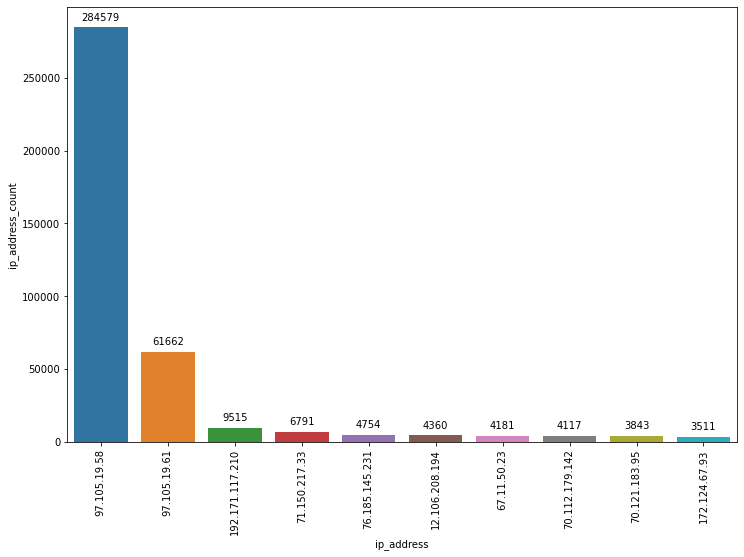

In [21]:
utils.visualize_target_counts(ip_df.head(10), 'ip_address', 'ip_address_count')

In [22]:
did_not_finish = log_df[log_df.cohort_id == 777]

In [23]:
ip_df = utils.generate_counts_and_probability_df(did_not_finish, 'ip_address')

In [24]:
ip_df

,ip_address,ip_address_count,ip_address_proba
0,97.105.19.58,15931,0.301193
1,70.117.16.60,1903,0.035978
2,67.11.117.74,1729,0.032689
3,70.94.165.107,1715,0.032424
4,23.116.170.48,1616,0.030552
...,...,...,...
408,172.8.175.183,1,0.000019
409,24.27.227.129,1,0.000019
410,155.91.49.181,1,0.000019
411,12.166.20.18,1,0.000019


In [25]:
# alter the ip df to only see those where rate < 1% and multiple accesses
dnf_frequent_access = ip_df[(ip_df.ip_address_proba < 0.01) & (ip_df.ip_address_count > 100)]

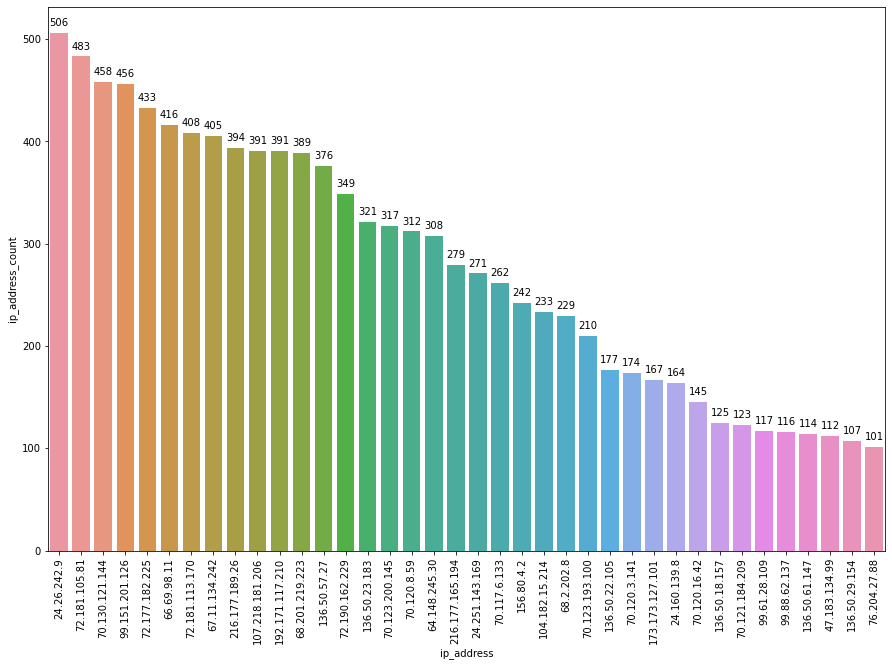

In [26]:
utils.visualize_target_counts(dnf_frequent_access, 'ip_address', 'ip_address_count', (15, 10))

Who is 24.26.242.9?

In [27]:
ip_24_26_242_9 = log_df[log_df.ip_address == "24.26.242.9"]

In [28]:
ip_24_26_242_9

,date,time,url,user_id,cohort_id,ip_address
timestamp,,,,,,
2019-02-12 19:02:09,2019-02-12,19:02:09,2.02.01_Probability,353,777.0,24.26.242.9
2019-02-13 20:26:47,2019-02-13,20:26:47,2.02.06_Correlation,353,777.0,24.26.242.9
2019-02-13 20:27:13,2019-02-13,20:27:13,2.00.00_Excel_Prob_Stats,353,777.0,24.26.242.9
2019-02-13 20:27:20,2019-02-13,20:27:20,2.02.00_Inferential_Stats,353,777.0,24.26.242.9
2019-02-13 20:27:24,2019-02-13,20:27:24,1._Fundamentals,353,777.0,24.26.242.9
...,...,...,...,...,...,...
2019-11-22 01:47:02,2019-11-22,01:47:02,1-fundamentals/1.2-data-science-pipeline,353,777.0,24.26.242.9
2019-11-22 01:47:03,2019-11-22,01:47:03,1-fundamentals/DataToAction_v2.jpg,353,777.0,24.26.242.9
2019-12-07 10:07:01,2019-12-07,10:07:01,/,353,777.0,24.26.242.9


This user accessed the curriculum for 10 months. Did they roll into another cohort and then drop?

In [32]:
# Explore user_id given ip_address
user_given_ip = utils.generate_conditional_probability_df(log_df, 'user_id', 'ip_address')

In [33]:
user_given_ip

,ip_address,user_id,proba_user_id_given_ip_address
0,100.11.170.135,658,1.0
1,100.19.73.35,658,1.0
2,100.35.67.162,52,1.0
3,103.137.12.164,469,1.0
4,103.208.220.130,369,1.0
...,...,...,...
7530,99.97.210.12,606,1.0
7531,99.98.245.245,618,1.0
7532,99.98.32.165,324,1.0
7533,99.98.32.97,481,1.0


In [34]:
user_ip_count = pd.DataFrame(log_df.groupby(['ip_address', 'user_id'])['url'].\
                              count().reset_index().\
                              rename(columns={'url': 'user_ip_count'}))


user_ip = user_given_ip.merge(user_ip_count)

In [35]:
user_ip

,ip_address,user_id,proba_user_id_given_ip_address,user_ip_count
0,100.11.170.135,658,1.0,114
1,100.19.73.35,658,1.0,408
2,100.35.67.162,52,1.0,11
3,103.137.12.164,469,1.0,9
4,103.208.220.130,369,1.0,1
...,...,...,...,...
7530,99.97.210.12,606,1.0,18
7531,99.98.245.245,618,1.0,2
7532,99.98.32.165,324,1.0,267
7533,99.98.32.97,481,1.0,46


In [37]:
log_df = log_df.reset_index().merge(user_ip, on=['ip_address', 'user_id'], how='left').fillna(value=0).set_index('timestamp')

In [38]:
log_df

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count
timestamp,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,0.016477,1016
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,0.016477,1016
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,0.016477,1016
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,0.016477,1016
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,0.021115,1302
...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,0.999853,6790
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,0.999853,6790
2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,0.999853,6790


In [40]:
ip_probas = utils.generate_column_probability_df(log_df, 'ip_address')

log_df = log_df.reset_index().merge(ip_probas, on=['ip_address'], how='left').fillna(value=0).set_index('timestamp')

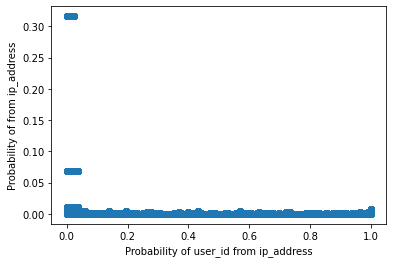

In [44]:
# scatter plot
plt.scatter(log_df.proba_user_id_given_ip_address, log_df.ip_address_proba)
plt.xlabel("Probability of user_id from ip_address")
plt.ylabel("Probability of from ip_address")
plt.show()

Focus on low probability of user_id from ip_address and high probability from ip_address

In [51]:
user_ip_anomaly = log_df[(log_df.proba_user_id_given_ip_address < .01) & (log_df.ip_address_proba > .3)]

In [114]:
user_ip_anomaly = pd.DataFrame(user_ip_anomaly)

In [116]:
# Examine the first row
student_then_instructor = user_ip_anomaly[user_ip_anomaly.user_id == 211]
student_then_instructor

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-07-16 07:51:57,2018-07-16,07:51:57,javascript-ii/promises,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 07:58:03,2018-07-16,07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 07:59:50,2018-07-16,07:59:50,javascript-ii/promises,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 08:13:09,2018-07-16,08:13:09,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 09:08:13,2018-07-16,09:08:13,javascript-ii/npm,211,1.0,97.105.19.58,0.009618,2737,0.316121
...,...,...,...,...,...,...,...,...,...
2020-03-18 09:37:19,2020-03-18,09:37:19,mysql/relationships/indexes,211,28.0,97.105.19.58,0.009618,2737,0.316121
2020-03-18 09:37:28,2020-03-18,09:37:28,mysql/relationships/joins,211,28.0,97.105.19.58,0.009618,2737,0.316121
2020-03-18 09:37:43,2020-03-18,09:37:43,mysql/relationships/sub-queries,211,28.0,97.105.19.58,0.009618,2737,0.316121


This user's cohort ID changed from 1 to 28.

In [62]:
student_then_instructor[student_then_instructor.cohort_id == 1]

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-07-16 07:51:57,2018-07-16,07:51:57,javascript-ii/promises,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 07:58:03,2018-07-16,07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 07:59:50,2018-07-16,07:59:50,javascript-ii/promises,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 08:13:09,2018-07-16,08:13:09,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-07-16 09:08:13,2018-07-16,09:08:13,javascript-ii/npm,211,1.0,97.105.19.58,0.009618,2737,0.316121
...,...,...,...,...,...,...,...,...,...
2018-12-05 16:44:05,2018-12-05,16:44:05,/,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-12-05 16:44:13,2018-12-05,16:44:13,mysql,211,1.0,97.105.19.58,0.009618,2737,0.316121
2018-12-05 16:44:15,2018-12-05,16:44:15,mysql/database-design,211,1.0,97.105.19.58,0.009618,2737,0.316121


In [60]:
student_then_instructor[student_then_instructor.cohort_id == 28]

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-12-07 09:16:21,2018-12-07,09:16:21,java-iii/deployment-and-dependencies,211,28.0,97.105.19.58,0.009618,2737,0.316121
2018-12-07 09:17:31,2018-12-07,09:17:31,java-iii/servlets,211,28.0,97.105.19.58,0.009618,2737,0.316121
2018-12-07 09:18:39,2018-12-07,09:18:39,java-iii/jsp-and-jstl,211,28.0,97.105.19.58,0.009618,2737,0.316121
2018-12-07 09:37:02,2018-12-07,09:37:02,mysql,211,28.0,97.105.19.58,0.009618,2737,0.316121
2018-12-07 09:37:03,2018-12-07,09:37:03,mysql/database-design,211,28.0,97.105.19.58,0.009618,2737,0.316121
...,...,...,...,...,...,...,...,...,...
2020-03-18 09:37:19,2020-03-18,09:37:19,mysql/relationships/indexes,211,28.0,97.105.19.58,0.009618,2737,0.316121
2020-03-18 09:37:28,2020-03-18,09:37:28,mysql/relationships/joins,211,28.0,97.105.19.58,0.009618,2737,0.316121
2020-03-18 09:37:43,2020-03-18,09:37:43,mysql/relationships/sub-queries,211,28.0,97.105.19.58,0.009618,2737,0.316121


cohort_id 1 might also be teaching assistants?

In [64]:
ta = log_df[log_df.cohort_id == 1]

In [82]:
ta_ids = list(ta.user_id.unique())
ta_ids

[11,
 60,
 64,
 95,
 141,
 146,
 148,
 170,
 209,
 211,
 212,
 248,
 257,
 312,
 313,
 316,
 398,
 402]

These are probably TAs because if it were a cohort, the IDs would be sequential.

Let's see if these user IDs shifted from cohort_id 1 to 28

In [84]:
ta_to_instructor = log_df[log_df.user_id.isin(ta_ids)]

In [91]:
ta_to_instructor.groupby('user_id').cohort_id.nunique()

user_id
11     2
60     1
64     4
95     1
141    1
146    2
148    2
170    1
209    1
211    2
212    1
248    2
257    2
312    2
313    1
316    1
398    1
402    1
Name: cohort_id, dtype: int64

In [92]:
user_64 = ta_to_instructor[ta_to_instructor.user_id == 64]

In [94]:
user_64.cohort_id.value_counts()

28.0     12530
1.0       3767
52.0        25
777.0       25
Name: cohort_id, dtype: int64

In [103]:
user_64[user_64.cohort_id == 1]

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-01-29 13:50:57,2018-01-29,13:50:57,/,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-29 13:51:00,2018-01-29,13:51:00,mkdocs/search_index.json,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-29 13:51:04,2018-01-29,13:51:04,mysql/users,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-30 10:13:09,2018-01-30,10:13:09,/,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-30 10:13:12,2018-01-30,10:13:12,spring,64,1.0,97.105.19.61,0.031397,1936,0.068496
...,...,...,...,...,...,...,...,...,...
2018-12-06 09:05:17,2018-12-06,09:05:17,javascript-ii,64,1.0,97.105.19.58,0.019994,5690,0.316121
2018-12-06 09:05:17,2018-12-06,09:05:17,javascript-i,64,1.0,97.105.19.58,0.019994,5690,0.316121
2018-12-06 09:05:18,2018-12-06,09:05:18,javascript-i/coffee-project,64,1.0,97.105.19.58,0.019994,5690,0.316121


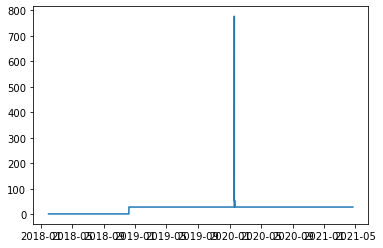

In [104]:
plt.plot(user_64.index, user_64.cohort_id)

This user was a TA, then an instructor, then left(?), joined a cohort, then went back to instruction.

In [125]:
user_64_ta = user_64[user_64.cohort_id == 1]

user_64_ta

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-01-29 13:50:57,2018-01-29,13:50:57,/,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-29 13:51:00,2018-01-29,13:51:00,mkdocs/search_index.json,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-29 13:51:04,2018-01-29,13:51:04,mysql/users,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-30 10:13:09,2018-01-30,10:13:09,/,64,1.0,97.105.19.61,0.031397,1936,0.068496
2018-01-30 10:13:12,2018-01-30,10:13:12,spring,64,1.0,97.105.19.61,0.031397,1936,0.068496
...,...,...,...,...,...,...,...,...,...
2018-12-06 09:05:17,2018-12-06,09:05:17,javascript-ii,64,1.0,97.105.19.58,0.019994,5690,0.316121
2018-12-06 09:05:17,2018-12-06,09:05:17,javascript-i,64,1.0,97.105.19.58,0.019994,5690,0.316121
2018-12-06 09:05:18,2018-12-06,09:05:18,javascript-i/coffee-project,64,1.0,97.105.19.58,0.019994,5690,0.316121


In [126]:
user_64_instructor = user_64[user_64.cohort_id == 28]
user_64_instructor

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-12-06 15:58:18,2018-12-06,15:58:18,jquery,64,28.0,97.105.19.58,0.019994,5690,0.316121
2018-12-06 15:58:21,2018-12-06,15:58:21,jquery/effects,64,28.0,97.105.19.58,0.019994,5690,0.316121
2018-12-07 13:50:06,2018-12-07,13:50:06,jquery/effects,64,28.0,97.105.19.58,0.019994,5690,0.316121
2018-12-07 14:31:20,2018-12-07,14:31:20,/,64,28.0,97.105.19.58,0.019994,5690,0.316121
2018-12-07 14:31:23,2018-12-07,14:31:23,javascript-ii,64,28.0,97.105.19.58,0.019994,5690,0.316121
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:49,2021-04-21,16:41:49,jquery,64,28.0,71.150.217.33,0.999853,6790,0.007544
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,0.999853,6790,0.007544
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,0.999853,6790,0.007544


This person is currently an instructor!

In [127]:
user_64_student = user_64[user_64.cohort_id == 52]
user_64_student

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2020-01-18 16:03:57,2020-01-18,16:03:57,mysql,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:03:58,2020-01-18,16:03:58,/,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:00,2020-01-18,16:04:00,1-fundamentals/1.3-pipeline-demo,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:01,2020-01-18,16:04:01,/,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:09,2020-01-18,16:04:09,/,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:10,2020-01-18,16:04:10,mysql,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:11,2020-01-18,16:04:11,1-fundamentals/1.3-pipeline-demo,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:12,2020-01-18,16:04:12,/,64,52.0,76.187.118.255,1.00000,126,0.000140
2020-01-18 16:04:18,2020-01-18,16:04:18,/,64,52.0,76.187.118.255,1.00000,126,0.000140


Belonged to a cohort for 3 days

In [128]:
user_64_left = user_64[user_64.cohort_id == 777]
user_64_left

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2020-01-18 09:52:57,2020-01-18,09:52:57,html-css/css-i/box-model,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:52:58,2020-01-18,09:52:58,/,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:53:00,2020-01-18,09:53:00,html-css/css-i/box-model,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:55:43,2020-01-18,09:55:43,/,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:55:44,2020-01-18,09:55:44,html-css/css-i/box-model,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:57:15,2020-01-18,09:57:15,html-css/css-i/box-model,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:57:16,2020-01-18,09:57:16,/,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:58:08,2020-01-18,09:58:08,html-css/css-i/box-model,64,777.0,12.106.208.194,0.19633,856,0.004843
2020-01-18 09:58:12,2020-01-18,09:58:12,html-css/css-i/box-model,64,777.0,12.106.208.194,0.19633,856,0.004843


Only gone for 1 day. Were they just testing something?

In [129]:
user_64_student.url.value_counts()

/                                   10
mysql                                5
1-fundamentals/1.3-pipeline-demo     4
toc                                  2
spring/fundamentals/views            1
java-iii                             1
spring                               1
teams                                1
Name: url, dtype: int64

In [130]:
user_64_left.url.value_counts()

/                                   11
html-css/css-i/box-model             7
slides                               2
mysql                                2
1-fundamentals/1.3-pipeline-demo     2
appendix                             1
Name: url, dtype: int64

In [133]:
me = log_df[log_df.user_id == 143]

In [139]:
me[me.cohort_id == 16]

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2018-03-18 15:24:59,2018-03-18,15:24:59,index.html,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-03-18 15:25:01,2018-03-18,15:25:01,mysql,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-03-18 15:25:04,2018-03-18,15:25:04,mysql/introduction,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-03-18 15:25:05,2018-03-18,15:25:05,mysql/users,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-03-18 15:25:07,2018-03-18,15:25:07,mysql/introduction,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-04-09 18:05:48,2018-04-09,18:05:48,index.html,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-04-09 18:05:50,2018-04-09,18:05:50,mysql,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-04-09 18:05:53,2018-04-09,18:05:53,mysql/introduction,143,16.0,173.174.192.127,1.000000,14,0.000016
2018-04-09 18:07:24,2018-04-09,18:07:24,mysql/tables,143,16.0,173.174.192.127,1.000000,14,0.000016


Reading up on sql apparently...

In [144]:
me[me.cohort_id == 133]

,date,time,url,user_id,cohort_id,ip_address,proba_user_id_given_ip_address,user_ip_count,ip_address_proba
timestamp,,,,,,,,,
2020-12-08 10:54:45,2020-12-08,10:54:45,/,143,133.0,68.201.242.151,0.404878,332,0.000911
2020-12-08 10:58:31,2020-12-08,10:58:31,fundamentals/intro-to-data-science,143,133.0,68.201.242.151,0.404878,332,0.000911
2020-12-08 10:58:31,2020-12-08,10:58:31,fundamentals/modern-data-scientist.jpg,143,133.0,68.201.242.151,0.404878,332,0.000911
2020-12-08 10:58:32,2020-12-08,10:58:32,fundamentals/AI-ML-DL-timeline.jpg,143,133.0,68.201.242.151,0.404878,332,0.000911
2020-12-08 15:13:06,2020-12-08,15:13:06,fundamentals/data-science-pipeline,143,133.0,68.201.242.151,0.404878,332,0.000911
...,...,...,...,...,...,...,...,...,...
2021-04-19 15:20:55,2021-04-19,15:20:55,timeseries/modeling-lesson1,143,133.0,173.174.194.60,0.529083,473,0.000993
2021-04-21 09:15:32,2021-04-21,09:15:32,anomaly-detection/overview,143,133.0,173.174.194.60,0.529083,473,0.000993
2021-04-21 09:15:32,2021-04-21,09:15:32,anomaly-detection/AnomalyDetectionCartoon.jpeg,143,133.0,173.174.194.60,0.529083,473,0.000993


In [145]:
me['hour_of_day'] = me.index.hour
me['day_of_week'] = me.index.day_name()

<AxesSubplot:xlabel='hour_of_day', ylabel='url'>

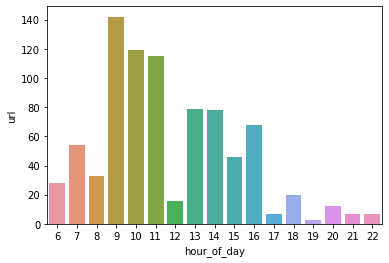

In [150]:
sns.barplot(x=me.groupby('hour_of_day').url.count().index, y=me.groupby('hour_of_day').url.count())

<AxesSubplot:xlabel='day_of_week', ylabel='url'>

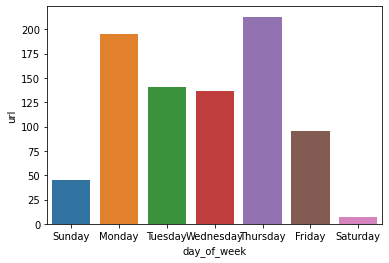

In [153]:
sns.barplot(x=me.groupby('day_of_week').url.count().index, y=me.groupby('day_of_week').url.count(), \
            order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])